# A Hands-On Introduction to Artificial Neural Networks

**By: [John 'Jack' Collins](https://www.mzes.uni-mannheim.de/d7/en/profiles/john-james-collins)**

Neural networks are powerful machine learning algorithms that form the basis of many important technologies, including generative AI and computer vision. However, they're not as straight-forward to implement as many other machine learning techniques, like random forest or logistic regression. If you're a researcher interested in applying neural networks, we've made a handy guide to help you easily prototype a neural network for your own use-case.

In this [tutorial](https://www.mzes.uni-mannheim.de/socialsciencedatalab/), we demonstrate how to get started with Artificial Neural Networks (ANN). This article is aimed at researchers who may be familiar with python, know some basic machine learning (i.e. logistic regression or random forest), but have yet to try using neural networks.

We will:

- Demonstrate how to quickly produce a model, train, validate, and evaluate it. We also show how to efficiently find the best hyperparameters.
- Offer reuseable code which makes it easy to prototype ANNs in your own project. 
- Introduce you to libraries Keras and Tensorflow, which together make one of the most popular approaches to AI coding. 
- Finish by demonstrating how a Keras model can be saved and loaded, enabling you to deploy the model as you please. 

By way of example, we will step through a simple classification problem with the well-known 'iris' dataset. We close with a brief demonstration of how the same code can easily be re-used to accomplish other use cases as well. 


## Introduction

### What are ANNs?
Even if you have no familiarity with the theory, you can still follow this tutorial, just review the following key points.

- An Artificial Neural Network is a type of supervised machine learner. It is trained on data and can then be used to make predictions about new data. In this tutorial, we will train an ANN to classify the species of flowers based on measurements of their petals. 

- In this tutorial, we introduce the simplest kind of ANN, a 'Feed Forward Neural Network' (FNN), also known as a 'Multilayer Perceptron' (MLP). There are many more complex types of ANN which are better-suited to more complex tasks, like time-series prediction (with Recurrent Neural Networks) and Image Processing (with Convolutional Neural Networks). These are great techniques to learn, and this tutorial offers a solid basis from which to continue learning about those elsewhere. In fact, you may even reuse the same code with minor adjustments to perform those exact techniques. 

- This tutorial is about stepping the reader through an example, and not about explaining what ANNs are. However, if you want to understand the theory, there are many resources available: We suggest [this video series ](https://www.youtube.com/watch?v=CqOfi41LfDw&ab_channel=StatQuestwithJoshStarmer) for an introduction to the theory of ANNs. If you want a very detailed understanding and are willing to purchase it, we can also recommend this excellent [Udemy course](https://www.udemy.com/course/deep-learning-tensorflow-2/).

- However, here's a brief description of an FNN: An FNN is composed of computational units called 'neurons' which are grouped in sets called 'layers.' The inputs from the independent features are passed through the layers of neurons. The neurons fit weights to the inputs in a way that derives connections between the independent features and the dependant variable.

- While ANNs are very well-suited for certain machine learning problems, in many scenarios simpler models, like logistic regression, may actually be better than ANNs. We'll explain this in the next section.


### What are ANNs useful for?

ANNs excel at non-linearly separable problems. In the following figure, we can see an example of a non-linearly separable problem compared to one that is linear. 

![linear-problems alt ><](fig1.png)

With a linear problem, you can see how it would be possible to draw a line (straight or curvy) between the blue and red dots. This means we could derive a linear function (or a polynomial function) which takes the X and Y coordinates and outputs a classification for whether the dot is blue or red. But in the non-linear problem, there is no way a line (no matter how curvy) can separate the blue and red dots. 

The functions which underpin ANNs allows for interactions between variables. This means the underlying function can fit to the X and Y inputs such that a dot is classified blue if the X coordinate is of a certain value AND the Y coordinates are within a certain range also. This innovation means that ANNs can fit to types of problems that are impossible for linear models. 

However, ANNs are not always best. Because ANNs can fit so finely to data, it is vulnerable to overfitting. When a problem is linearly separable, it may often be better to use the simpler, and less overfit-prone model instead. 

Those readers familiar with tree-based models might recognize that tree algorithms can also handle interactions between features. It is true that tree-based models are also good for non-linearly separable problems as well as ANNs. Tree-based models partition a feature space, such as the X and Y coordinate space in the diagram above, into subsections and classify points based on which subsection they fall into. A key difference betweens ANNs and trees, is that while tree-based models usually have distinct boundaries between subsections (a result of the binary decision functions in the trees), ANNs are better suited to yield varying probabilities for classification classes across the space. This is not to say tree-based models do not output probabilistic predictions (they do), just that ANNs can be better suited to finely tune those probabilities. See [this article](https://towardsdatascience.com/when-and-why-tree-based-models-often-outperform-neural-networks-ceba9ecd0fd8#:~:text=The%20primary%20difference%20in%20usage,power%20of%20tree%2Dbased%20methods.) for a deeper discussion of the differences between tree-based models and neural networks. 


### How do I get started?

In this tutorial, we will step through an example from which you can reuse this code in your own project. We will demonstrate how to use Keras and Tensorflow, together, this is the most common starting point for learning neural networks. Before we begin, here's a quick introduction to these two packages.

#### What is Tensorflow?

[Tensorflow](https://www.tensorflow.org/about#:~:text=TensorFlow%20gives%20you%20the%20flexibility,fast%20debugging%2C%20use%20eager%20execution.) is one of [the most popular](https://www.forbes.com/sites/janakirammsv/2020/11/27/tensorflow-turns-5five-reasons-why-it-is-the-most-popular-ml-framework/) tools for developing neural networks. Tensorflow is not a library for making neural networks per se. Rather, Tensorflow is for efficiently handling the mathematic operations that neural networks rely on. ANNs utilize a lot of linear algebra, matrix operations and node-edge graph manipulations. Tensorflow provides a set of functionality to accomplish these operations efficiently with C++ code and allows the developer to use these functions with a python interface. 

#### What is Keras?
As discussed, Tensorflow itself doesn't directly provide neural network functionality. Instead, the programmer who wants to develop an ANN will need another library. [Keras](https://keras.io/why_keras/#:~:text=Keras%20prioritizes%20developer%20experience&text=Keras%20follows%20best%20practices%20for,learn%20and%20easy%20to%20use.) provides programmers a way to declare what kind of ANN they want and then Keras accomplishes the interfacing with Tensorflow to generate the network. Tensorflow focusses on accomplishing the mathematics efficiently, while Keras provides programmers an easy way to develop their models. 
Although Keras and Tensorflow are very often used together, they are actually independent. Keras can be used to interface with an alternative to Tensorflow, like Theano. Similarly, developers can use an alternatives to Keras, like TFLearn and still use Tensorflow in the backend. 

## Setup
Before writing the code, we import the necessary libraries and set a few configurations.

In [1]:
## Libraries to pip install
# keras-tuner
# matplotlib
# numpy
# pandas
# scikit-learn
# tensorflow

import copy # helps make deep copies of keras models. 
import keras_tuner as kt # for hypertuning with keras models. 
import matplotlib # visualization library
import numpy as np # popular library for mathematic operations
import pandas as pd # popular library for data table manipulation
import shap # explained in 'interpretation' section below
import shutil # file and directory manipulation
import sklearn as sk # for evaluation metrics and the example datasets. 
import tensorflow as tf 
import warnings

from keras.utils import np_utils
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    confusion_matrix,
    ConfusionMatrixDisplay, 
    accuracy_score, 
    mean_absolute_error
    )
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping
from keras.losses import Loss
from keras.losses import SparseCategoricalCrossentropy


## Tensorflow issues some warnings but they are not 
# important for us, so we'll just suppress them. 
warnings.simplefilter("ignore")
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

## Setting random seed for reproducible results
tf.keras.utils.set_random_seed(42)

## Data
In this section, we introduce the dataset for our experiment. We use the [iris dataset](https://archive.ics.uci.edu/ml/datasets/iris), in which we aim to classify which of three species of flower the subject is, based on measurements of petals and sepals. 

### Import

In [2]:
dataset = datasets.load_iris(return_X_y=False, as_frame=False)
X = dataset.data
y = dataset.target
## a keras utility function to one hot encode (OHE) the vector of 
# categories y.
y = np_utils.to_categorical(y) 

## The number of unique classes we seek to classify. 
# There are three species of iris in our dataset. 
n_classes = len(dataset.target_names) 

## ANNs require us to specify an 'input shape.' If our input were 
# images, we might have a 2d input, but for this problem, 
# it is just the number of predictive features, which is 4.
input_shape = len(dataset.feature_names)

## This is a list of the titles of the features.
feature_names = dataset.feature_names 

## Test-train splitting
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.33, 
    random_state=42
    )

### Data Inspection

#### The predictive features (X)
Our X value is a matrix of floats where each row is a flower and each column is a measurement. 

In [3]:
pd.DataFrame(X,columns = feature_names).head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### The dependant (y)
For each row in X, there is a corresponding item in the vector y, which represents the species of flower. There are three unique species in our dataset as shown in the table below.
However, our dependant y must come in the form of a One Hot Encoded (OHE) matrix, not a vector. In this format, there are three columns with a zero or one value to indicate which species of flower is this subject. 

In [4]:
pd.DataFrame(y[:5],columns = dataset.target_names)

,setosa,versicolor,virginica
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0


Let us inspect this same data when converted to an array, this will be used to 'flatten' the matrix form of y to a vector. Each row is a 'setosa' (0).

In [5]:
y[:5].argmax(axis=1)

array([0, 0, 0, 0, 0], dtype=int64)

## Modelling

### A Simple ANN

If we want to develop a simple ANN, the Keras library makes this extremely simple. The code stub below defines a function `get_simple_ann()` and the following is the stp by step of that function:

1. We instantiate an empty 'sequential' model, so-called because each layer of neurons (which we shall add shortly) will feed into the subsequent layer (hence why this is also called a 'Feed Forward' network).

2. We must populate our empty Sequential model with layers. Here we will use 'Dense' layers, which are simply arrays of neurons. This is the most basic type of neural network layer. 

3. After the Dense layer, we add a 'Dropout' layer. The Dropout layer is like a gatekeeper: it selects certain neurons in the previous layer and blocks its input from going to the next layer. This nullification is helpful for avoiding overfitting caused by neurons over-weighting certain signals in the data. Dropout layers use a fitting process to determine which neurons are the best to 'drop' to improve predictive performance. 

4. We repeat steps 2 & 3 to add another Dense-Dropout combo to the network. ANNs typically feature more than one layer of neurons to enable more interactions between features. 

5.  We add the output layer. The shape of the output layer is important because it determines the format of the predictions. Because we have three classes in our classification problem, we want three outputs: each one will yield a float which represents the probability that a given case is of the corresponding species. 
If this were a regression problem, or a binary regression problem, we might only want one output unit, which would output just the regression value, or the probability of the binary case being a positive. 

6. Once we have used the `Sequential` object to define the architecture of our model (meaning the number layers and the composition of neurons, etc), we need to 'compile' the object, which means to let Tensorflow convert the python code of our model into the lower-level 'Tensors' which can be more efficiently computed once we are ready to train this model. 

#### Terminology:
- Batch size: This parameter instructs the ANN to trial that number of cases with a set of 
random weights before trialing another batch with a new set of weights. A large batch size enhances computational efficiency, at the potential cost of accuracy. 

- Epochs: The number of times the ANN shall repeatedly use the training data to find the optimum set of weights. 
A large number of epochs may increase accuracy, but takes longer to compute. 

- Optimizer: In the fitting process, random weights are trialed for every neuron and the best combination is selected. However, trying every possible random combination is very inefficient. Instead, optimizers apply algorithms that aim to discover which combinations of parameters for each node is best. Instead of randomly selecting weights, the optimizer applies a guided process to discovering the best settings. These algorithms for determining the optimum weights are called 'gradient descent' algorithms. 

- Learning rate: The incremental value by which the optimizer varies weights.  A larger learning rate may be quicker to compute, but less accurate.

- Loss Function: During the fitting process, the loss function is how we calculate if a given trial was better or worse that others. Here we use 'Binary Cross Entropy' which is a common selection for classification problems. Mean-squared error would be an appropriate choice for regression problems. 

- Metrics: Machine learning practitioners know there are many ways to evaluate a model's performance. We can record multiple metrics to evaluate performance. For example, we can examine the model's accuracy (the portion of correct predictions) and the recall (the portion of correctly classified cases of a given class among all cases of that class). 

In [6]:
def get_simple_ann(
        input_shape: int|tuple,
        output_shape:int|tuple
        ) -> keras.models.Sequential:
    """
    This function returns an instance of a 
    Keras Sequential model which is ready to 
    fit with training data.
    
    Args:
    input_shape: int or tuple. Describes the 
    dimensions of a single case of input.
    output_shape: int or tuple. The desired 
    shape of output. 
    
    Returns:
    A compiled instance of a keras Sequential model
    """

    ## Step 1: Instantiate an empty Sequential model object
    ann = keras.models.Sequential()
    
    ## Step 2: Adding the input layer with same number 
    # of nodes as we have input features
    ann.add(
        keras.layers.Dense(
            units = 16,
            activation='relu', 
            input_dim=input_shape
            )
        )
    
    # Step 3: Adding 10% dropout to prevent overfitting
    ann.add(keras.layers.Dropout(rate=0.1))
    
    ## Step 4: Adding another Dense-Dropout combo to 
    # make a second layer in the network
    ann.add(
            keras.layers.Dense(
            units = 16, 
            activation='relu'
            )
        )
    ann.add(keras.layers.Dropout(rate=0.1))
    
    ## Step 5: Adding the output layer. This must match the 
    # format of our y variable
    ann.add(
            keras.layers.Dense(
            units = output_shape, 
            activation='softmax'
            )
        )
    
    ## Step 6: Once we have defined the architecture of 
    # our ANN, we call compile() to convert the model to tensors.
    ann.compile(
        optimizer='adam', 
        loss='binary_crossentropy', 
        metrics=['accuracy']
        )
    return ann

## Calling our function
simple_ann = get_simple_ann(
    input_shape = input_shape,
    output_shape = n_classes
    )

## Fitting to training data
simple_ann.fit(
    X_train,
    y_train,
    batch_size=100, 
    epochs=150,
    verbose=False
    )

## Making predictions
# argmax() here is used to 'flatten' the matrix form of the 
# dependant variable (as seen above) into a vector of integers 
# which correspond to classes. 
predictions = simple_ann.predict(X_test).argmax(axis=1) 

## Accuracy score
accuracy = accuracy_score(y_test.argmax(axis=1),predictions)
print("Accuracy of this model is: "+"{:1.2f}".format(accuracy*100)+"%")

2/2 [==============================] - 0s 0s/step
Accuracy of this model is: 70.00%


#### Visualizing the ANN
![image](fig2.png)

From the code above, we are constructing an ANN like the one in this diagram. We have four features in our data, and so we have four input nodes to receive each value. If you know the theory of ANNs, you know that each node will apply a weight and an activation function to the input to determine the number it will output to every node in the next layer. However, we use a dropout layer, which will select some nodes to nullify. We have two such layers. Finally, we have three output nodes, representing the probability that the given case is of a certain species. Therefore, for each case we predict, we output three numbers. We conclude that whichever of those three numbers is largest corresponds to the most likely species for the given case. 
### Evaluating this model
As we can see from the output above, this model was 70% accurate, meaning it classified 70% of cases as the correct species. 

### Why we need hypertuning
Is 70% accuracy the best we can do? What if we had more than 12 nodes in each layer? Or fewer? What if we added more layers? Or increased the dropout rate?
Hypertuning is how we experimentally verify which parameters are best.

To accomplish this, we could try repeatedly fitting the model with every possible combination of parameters (this is called 'Grid Search'). However, for many parameters, this would require a lot of fittings. Instead, the ['keras tuner'](https://keras.io/guides/keras_tuner/getting_started/) library was created to efficiently trial different hyperparameter selections.

### A Hypermodel Class
In this section, we provide the code for a hypermodel class. You can copy this class into your own project and try it. If you are familiar with inheritance, you could also extend this class for more complex functionality, such as time-series or computer vision problems. This class provides a solid base from which to trial many different kinds of ANNs and apply it to many kinds of machine learning tasks. You could easily reuse this class for regression, or a different classification problem.
The purpose of this class is to:
- Receive a dictionary describing the desired hyperparameters to explore
- Receive the parameters of how you wish to fit the model (epochs, batch size, etc)
- Efficiently discover the optimum hyperparameters
- Returns the 'best' discovered model

The following is a lot of code, so if you are not interested in the details, you can skip reading the following code block. In the next section, we shall demonstrate the use of the class, which you can go on to reading instead. Like many classes, you don't necessarily need to know all the details of *how* it works, only how to use it. 

If you would like to understand this class in detail, we recommend reading the documentation on the [keras-tuner library](https://keras.io/guides/keras_tuner/getting_started/).

To help explain the class, we also introduce some more terminology.

#### Terminology

- Objective: One of the metrics. The 'best' model is the one with the highest value. 
- Hypergrid: Is a dictionary-like structure that specifies what values for each parameter to trial.
- Callbacks: In this context, the callback is a special type of function called at the end of each epoch. In this example, we use 'EarlyStopping,' which is helpful for reducing computation time. With early stopping, once each additional epoch only improves the objective slightly, we conclude we have reached a point of diminishing return and finish the fitting process without completing every epoch.
- Width: The number of units is a particular layer.
- Depth: The number of layers in an ANN.
- Validation split: By default, the tuner selects the model with the best value for the objective as calculated on training data. However, we can optionally specify a validation split size, whereby a random sample of training data will be withheld, and we select the best model as validated against that holdout data. This can be helpful in avoiding overfitting to training data.
- Activation function: a function which each node in a layer uses to convert the inputted values into the outputted values. A sigmoid function would be appropriate for the activation function of an output node doing classification, while no function would be appropriate for a regression. For a discussion on the different types of common functions, see [this article](https://towardsdatascience.com/activation-functions-neural-networks-1cbd9f8d91d6).

In [7]:
class ANNHyperModel(kt.HyperModel):
    """
    Given a set of hyperparameters to explore, 
    uses keras-tuner to discover the best settings 
    and returns the optimum model.
    """
    
    _default_hypergrid = {
            'width':{
                'min':12,
                'max':12,
                'step':1
                },
            'depth':{
                'min':1,
                'max':1,
                'step':1
                },
            'droprate':{
                'min':.8,
                'max':.8,
                'step':.1
                },
            'activation':{
                'values':['relu']
            },
            'learning_rate':{
                'values':[1e-2]
            }
        }
    """If the user does not input values for the 
    following hyperparameters, we use these values by default."""
    
    def __init__(
                self,
                input_shape:tuple|int,
                n_outputs:int,
                hypergrid:dict = None,
                output_activation:str = 'sigmoid',
                epochs:int = 1,
                batch_size:int = 100,
                optimizer_class = keras.optimizers.Adam,
                loss: Loss = SparseCategoricalCrossentropy(
                                        from_logits=True
                                        ),
                metrics: list[str] = ['accuracy'],
                objective:str = "accuracy",
                directory:str = None,
                project_name:str = "kt_hyperband",
                factor:int = 3,
                verbose:int = 0,
                callbacks:list = []
    ):
        """
        Args:
        - input_shape (tuple | int): Dimensions of a single input case. 
        Provide an int of n if one case is a 1-d array of length n.

        - n_outputs (int): Number of output nodes. One for regression or 
        binary-classification. Multiple for 
        multi-regression/multi-classification.

        - hypergrid (dict, optional): Dictionary describing hyperparams 
        to trial, see default '_default_hypergrid' for example. 
        Defaults to None.

        - output_activation (str, optional): Output layer activation 
        function. Defaults to 'sigmoid'.

        - epochs (int, optional): Training epochs. Defaults to 1.

        - batch_size (int, optional): training batch size. 
        Defaults to 100.

        - optimizer_class (_type_, optional): Optimizer class. 
        Input the class type, not an instantiation. Defaults to 
        keras.optimizers.Adam.

        - loss (tf.keras.losses.Loss, optional): training loss function. 
        Defaults to 
        keras.losses.SparseCategoricalCrossentropy(from_logits=True).
        
        - metrics (list[str], optional): Training metrics. Defaults 
        to ['accuracy'].
        
        - objective (str, optional): Must be included in 'metrics.' 
        Tuning process will select the model with the best performance
        by this metric. Defaults to "accuracy".
        
        - directory (str, optional): When used, tuning process creates 
        a directory to hold data on disk. Deleted afterwards. 
        Be careful not to use existing dir name. Defaults to "None".
        
        - project_name (str, optional): File naming stem in directory. 
        Defaults to "kt_hyperband".

        -factor (int, optional): Reduction factor for epochs at each 
        tuning trial. Defaults to 3.

        -verbose (int, optional): Set to true to print details of 
        fitting process. Defaults to 0.
        
        - callbacks (list, optional): A keras.callback function called 
        after each epoch. Defaults to [].
        """
        self.input_shape = input_shape
        self.n_outputs = n_outputs
        self.hp = kt.HyperParameters()
        self.hypergrid = hypergrid
        self.output_activation = output_activation
        self.epochs = epochs
        self.optimizer_class = optimizer_class
        self.loss = loss
        self.metrics = metrics
        self.objective = objective
        self.callbacks = callbacks
        self.directory = directory
        self.project_name = project_name
        self.factor = factor
        self.verbose = verbose
        self.batch_size = batch_size
        self.history = None # null before training

    def get_hypergrid(self):
        """Returns the user-specified hypergrid, plus the default items 
        (from _default_hypergrid) where the user did not specify 
        values"""
        output = copy.deepcopy(ANNHyperModel._default_hypergrid)
        if self.hypergrid is None:
             self.hypergrid = {}
        output.update(self.hypergrid)
        return output

    ## If you want to try more complex types of ANN, you should extend 
    # this class and overwrite this function with your own logic. 
    # For example, instead of adding Dense layers, you could add LSTM 
    # layers instead to create an RNN. 
    def build(self,hp:kt.HyperParameters):
        """Using an instance of kt.HyperParameters, we build and 
        compile a Keras Sequential instance with 
        some parameters filled by HyperParameter objects instead of 
        literal values. The Keras Hyperband object can then execute 
        a search function using this hypermodel to discover the 
        best model setting."""

        ## here we take the hypergrid and use it to construct a set of 
        # kt.HyperParameter objects
        hypergrid = self.get_hypergrid()
        width_hyperparam = hp.Int(
              'units', 
              min_value=hypergrid['width']['min'], 
              max_value=hypergrid['width']['max'], 
              step=hypergrid['width']['step']
              )
        depth_hyperparam = hp.Int(
              'layers', 
              min_value=hypergrid['depth']['min'], 
              max_value=hypergrid['depth']['max'], 
              step=hypergrid['depth']['step']
              )
        droprate_hyperparam = hp.Float(
              'droprate', 
              min_value=hypergrid['droprate']['min'], 
              max_value=hypergrid['droprate']['max'], 
              step=hypergrid['droprate']['step']
              )
        activation_hyperparam = hp.Choice(
              'activation', 
              values=hypergrid['activation']['values']
              )
        learning_rate_hyperparam = hp.Choice(
              'learning_rate', 
              values=hypergrid['learning_rate']['values']
              )

        model = keras.Sequential()
        model.add(
              keras.layers.Input(
              shape=self.input_shape
              )
            )
        
        ## Add a Dense-Dropout combo for each layer in the depth param
        for layer_number in range(0,depth_hyperparam):
              model.add(
                    keras.layers.Dense(
                        units=width_hyperparam,
                        activation=activation_hyperparam,
                        name = 'Dense_'+str(layer_number)
                        )
                    )
              model.add(
                   keras.layers.Dropout(droprate_hyperparam)
              )
        
        model.add(
                keras.layers.Dense(
                self.n_outputs,activation=self.output_activation
                )
            ) 

        model.compile(
            optimizer=self.optimizer_class(
                learning_rate=learning_rate_hyperparam
                ),
            loss=self.loss,
            metrics=self.metrics
            )
        ## This function must return an instance of a keras 
        # model that includes kt.Hyperparamater objects
        return model 
    
    def _hypertune(self,X_train, y_train, validation_size = 0):
        """This function executes the hypertuning of the
          built hypermodel"""
        self.build(self.hp)
        
        self.tuner = kt.Hyperband(
            ## We can input an instance of the custom class here (self) 
            # and the 'build' function will be called by keras 
            # Hyperband. 
                self, 
                objective= self.objective,
                max_epochs= self.epochs,
                factor=self.factor,
                hyperband_iterations=10,
                directory=self.directory,
                project_name=self.project_name
                )
        ## use validation split if validation_size > 0
        validation_sets = None
        if validation_size > 0:
            X_train, X_val, y_train, y_val = train_test_split(
                    X_train, 
                    y_train, 
                    test_size=validation_size
                    )
            validation_sets = (X_val,y_val)

        self.tuner.search(
               X_train,
               y_train, 
               epochs=self.epochs, 
               callbacks=self.callbacks, 
               verbose=self.verbose,
               batch_size=100,
               use_multiprocessing=True,
               validation_data=validation_sets
               )
        self.best_hyperparams=self.tuner.get_best_hyperparameters()[0]

        best_model = self.tuner.hypermodel.build(self.best_hyperparams)

        return best_model
    
    def execute(self,X,y,validation_size = 0):
        """
        Fit the model on training data.

        Args:
            - X (_type_): predictors, ndarray
            - y (_type_): dependant, ndarray or 1-d array
            - validation_size (int, optional): If > 0, tuner will 
            record validation performance of the objective. Set 
            objective to 'val_<metric name>' to select best model 
            on validation data. Defaults to 0.

        Raises:
            - e: If errors occur during fitting, a 'final' clause is 
            invoked to ensure the tuning directory is still deleted. 
        """
        ## Use finally clause to ensure the tuning dir is deleted even 
        # if there is an error.This failsafe is used because 'leftover' 
        # tuning directories from previous fittings can cause errors.
        try:
            self.model = self._hypertune(X,y,validation_size)
            self.history = self.model.fit(
                X,
                y, 
                batch_size=self.batch_size, 
                epochs=self.epochs,
                callbacks=self.callbacks, 
                verbose = self.verbose)
        except Exception as e:
            raise e
        
        finally:
            try:
                  shutil.rmtree(self.directory)
            except FileNotFoundError as e:
                 pass


### Demonstrating Hypermodel Class
You may skip reading the detail of how the `ANNHyperModel` class works and instead just review the following section to see a demonstration use case. 

In [8]:
hypergrid = {
                'width':{
                    'min':16,
                    'max':64,
                    'step':12
                    },
                'depth':{
                    'min':1,
                    'max':4,
                    'step':1
                    },
                'droprate':{
                    'min':0.1,
                    'max':0.7,
                    'step':0.2
                    },
                'activation':{
                    'values':['relu']
                }
            }

model = ANNHyperModel(
    input_shape =input_shape,
    n_outputs = n_classes,
    epochs = 150,
    loss = keras.losses.BinaryCrossentropy(),
    hypergrid = hypergrid,
    objective="val_accuracy",
    directory = 'kt-dir',
    callbacks=[
        EarlyStopping(
            monitor='loss', 
            patience=5
            )
        ]
    )

model.execute(X_train,y_train,validation_size=.2)

#### Making predictions
Now that we have our fitted model, let us evaluate its predictive power. In this context, we're going to use accuracy as our evaluation metric. Accuracy is the portion of classifications which were correct. Typically, this metric is suitable when there are roughly equal numbers of classes in the data and we consider any kind of misclassification as equally undesirable.

In [9]:
y_pred = model.model.predict(X_test).argmax(axis=1)

accuracy = accuracy_score(y_test.argmax(axis=1),y_pred)
print("Accuracy of this model is: "+"{:1.2f}".format(accuracy*100)+"%")

2/2 [==============================] - 0s 0s/step
Accuracy of this model is: 98.00%


Success!! The best model discovered by our hypertuner was 98% accurate, a big improvement over 70% in our basic model. 

#### Fitting history
The history parameter helps us monitor how effectively the fitting process converged on the optimum accuracy. We can construct a timeline which shows us how the accuracy metric improved at each epoch as the optimizer progressively improved the weightings. Note that once a point of diminishing return is reached, the EarlyStopping callback function will conclude the fitting process early to save computation time, which is why we cannot see the requested 150 epochs. 

Practitioners should expect to see a steady increase in performance over epochs. A history showing no improvement over epochs would indicate a problem with the model. 

<Axes: xlabel='Epochs', ylabel='Accuracy'>

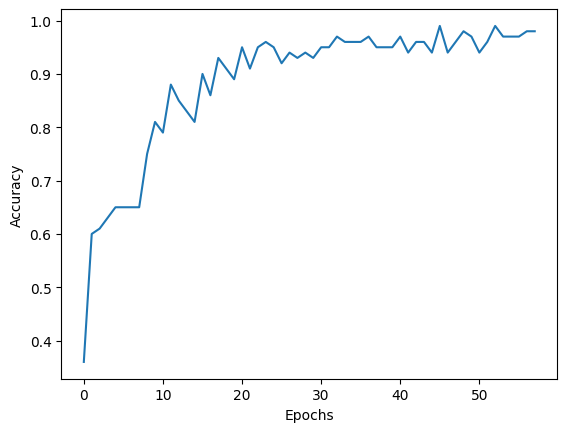

In [10]:
pd.Series(
    model.history.history['accuracy']
    ).plot(
        xlabel='Epochs',
        ylabel="Accuracy"
        )

#### What were the best hyperparameters?
The `best_hyperparams` property will tell us which of the parameters we trialed was best. Note that some of the 'tuner' parameters are internal considerations for the tuner and not important to us for now. 

In [11]:
model.best_hyperparams.values

{'units': 52,
 'layers': 2,
 'droprate': 0.1,
 'activation': 'relu',
 'learning_rate': 0.01,
 'tuner/epochs': 2,
 'tuner/initial_epoch': 0,
 'tuner/bracket': 4,
 'tuner/round': 0}

### What does our model look like?
We can use the `summary()` function to print out a basic summary of our model's architecture. 

In [12]:
model.model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Dense_0 (Dense)             (None, 52)                260       
                                                                 
 dropout_1 (Dropout)         (None, 52)                0         
                                                                 
 Dense_1 (Dense)             (None, 52)                2756      
                                                                 
 dropout_2 (Dropout)         (None, 52)                0         
                                                                 
 dense_1 (Dense)             (None, 3)                 159       
                                                                 
Total params: 3,175
Trainable params: 3,175
Non-trainable params: 0
_________________________________________________________________


### Evaluating Performance
We know the model was 98% accurate, but let us examine more deeply how well it classified each species. We shall use a confusion matrix. 

Text(0.5, 1.0, 'Confusion Matrix')

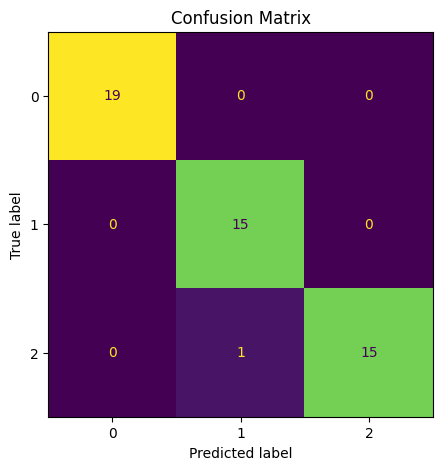

In [13]:
matplotlib.rc('figure', figsize=(5,5))
ConfusionMatrixDisplay(
    confusion_matrix(
        y_test.argmax(axis=1), 
        y_pred)
        ).plot(
            colorbar=False
            )
plt.title('Confusion Matrix')

### Interpreting the model
Most consumers of machine learning models want to know *why* a model gives the output it does. This can be a difficult task for a complex neural network, with many interactions nested in the algorithm. In a linear model, each feature has a positive or negative impact on the outcome. In an interactive model, the direction and size of effect is conditional and not so simple to describe. 
A common method for explaining why models output as they do is 'permutational feature importance' in which we calculate the loss of accuracy in a model when it does not have a given feature available. However, this is a lot of repeated computation when you have many features and ANNs can be slow for this. 

Another approach is [SHapley Additive exPlanations (SHAP)](https://shap.readthedocs.io/en/latest/), which uses an algorithm based on game-theory as well as many computational optimizations, to efficiently calculate 'SHAP values' for an ANN. Here we shall demonstrate SHAP. A larger SHAP value indicates the feature is more influential. 

<Axes: title={'center': 'SHAP Values'}>

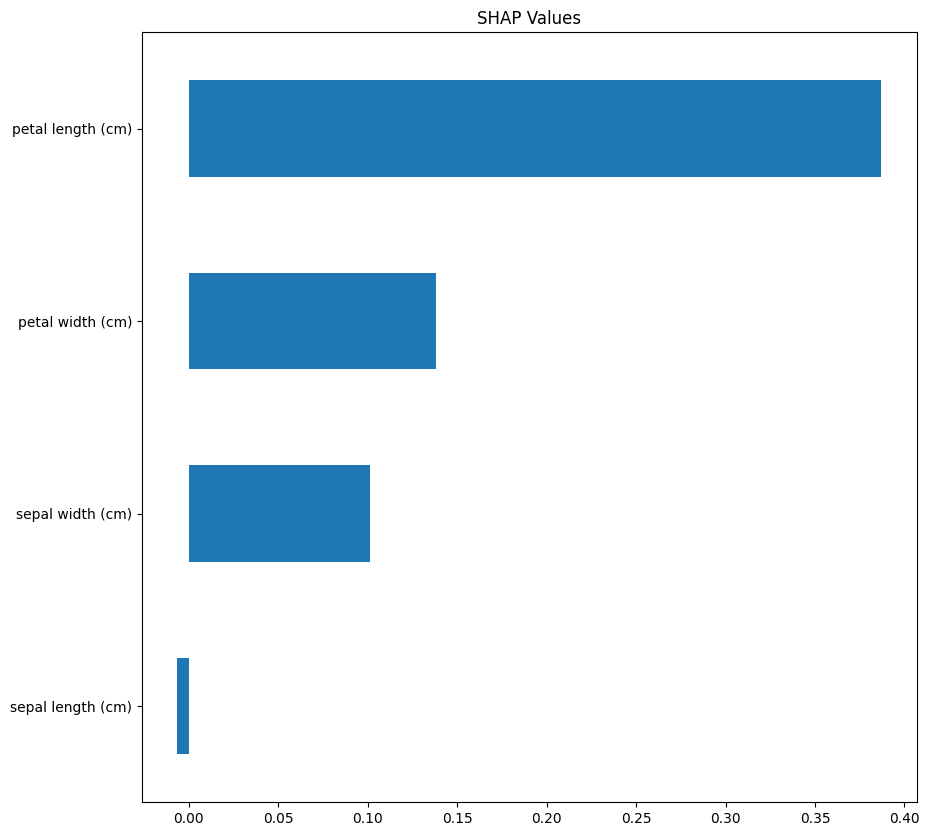

In [14]:
deep_explain = shap.DeepExplainer(model.model, X_test)
deep_shap_values= deep_explain.shap_values(X_test[1:5])

matplotlib.rc('figure', figsize=(10,10))
pd.Series(
    deep_shap_values[0][0],
    index=feature_names
    ).sort_values(
    ).plot.barh(
        title='SHAP Values'
        )

It appears that petal length and width are the most important factors when trying to classify a flower. Sepal width is also important, but sepal length is relatively inconsequential. 

## Save and Load Keras Models
Often, once we have developed our model, we want to deploy it elsewhere so it can used in some other application. 
Keras offers a method for saving the model as a directory of files, which can then be sent anywhere you desire. 
That directory can then be loaded in python runtime to instantiate a replica of the fitted model. It is ready to make predictions right after loading. 

In [15]:
model.model.save('keras_model')
loaded_model = keras.models.load_model('keras_model')

loaded_model_y_preds = loaded_model.predict(X_test) >= .5

loaded_model_accuracy = accuracy_score(
    y_test,
    y_pred = loaded_model_y_preds
    )
print(
    "Accuracy of this simple model is: "+
    "{:1.2f}".format(accuracy*100)+"%"
    )

2/2 [==============================] - 0s 0s/step
Accuracy of this simple model is: 98.00%


## Other use cases
In case you want to reuse this code, but for some other use case, like binary classification or regression, we demonstrate how the same class can easily accomplish those as well. 

### Binary Classification

In [16]:
dataset = datasets.load_breast_cancer(
    return_X_y=False, as_frame=False
    )
X = dataset.data
y = dataset.target
y = np_utils.to_categorical(y)
n_classes = len(dataset.target_names) 
input_shape = len(dataset.feature_names)
feature_names = dataset.feature_names 
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.33, 
    random_state=42
    )

model = ANNHyperModel(
    input_shape =input_shape,
    n_outputs = n_classes,
    epochs = 150,
    loss = keras.losses.BinaryCrossentropy(),
    hypergrid = hypergrid,
    objective="val_accuracy",
    directory = 'kt-dir',
    callbacks=[EarlyStopping(monitor='loss', patience=5)]
    )

model.execute(X_train,y_train,validation_size=.2)

y_pred = model.model.predict(X_test).argmax(axis=1)
accuracy = accuracy_score(y_test.argmax(axis=1),y_pred)
print(
    "Accuracy of this model is: "+
    "{:1.2f}".format(accuracy*100)+"%"
    )

6/6 [==============================] - 0s 3ms/step
Accuracy of this model is: 94.15%


### Regression

In [17]:

dataset = datasets.load_diabetes(return_X_y=False)
X = dataset.data
y = dataset.target
input_shape = len(dataset.feature_names)
feature_names = dataset.feature_names 
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.33, 
    random_state=42
    )

model = ANNHyperModel(
    input_shape =input_shape,
    ## we are predicting one continuous variable, so we want 
    # only one output node
    n_outputs = 1, 
    epochs = 150,
    loss = keras.losses.MeanAbsoluteError(),
    output_activation=None,
    hypergrid = hypergrid,
    metrics=[
            tf.keras.metrics.MeanSquaredError(
            name="mean_absolute_error", 
            dtype=None
            )
        ],
    objective="val_mean_absolute_error",
    directory = 'kt-dir',
    callbacks=[EarlyStopping(monitor='loss', patience=5)]
    )

model.execute(X_train,y_train,validation_size=.2)

## use flatten because the single output node outputs a 
# series of vectors of 1 item each. Flatten makes 
# 1d array instead
y_pred = model.model.predict(X_test).flatten() 

error = mean_absolute_error(y_test,y_pred)
print("MAE of this model is: "+"{:1.2f}".format(error*100))

5/5 [==============================] - 0s 0s/step
MAE of this model is: 4506.16


## Conclusion
This article provided a hand-on demonstration of how to implement ANNs for your own context. By following the code in this article, you should be able to adapt the reusable `ANNHyperModel` class to your own project. ANNs are a powerful machine learning algorithm, and can be applied to many different problems. With a basic understanding of how to implement ANNs, you can also start to progress to learn more advanced types of neural networks, including Recurrent Neural Networks and Convolutional Neural Networks. 

### Further reading
- [This video tutorial series on the theory of ANNs.](https://www.youtube.com/watch?v=CqOfi41LfDw&ab_channel=StatQuestwithJoshStarmer)
- [The tensorflow playground](https://playground.tensorflow.org), a fun visual aid for intuitively understanding how neural networks function. 
- [The documentation for Tensorflow.](https://www.tensorflow.org/)
- [The documentation for SHAP.](https://shap.readthedocs.io/en/latest/)

### About the author
[John 'Jack' Collins](https://www.mzes.uni-mannheim.de/d7/en/profiles/john-james-collins) is a PhD candidate at the Mannheimer Zentrum für Europäische Sozialforschung (MZES). Jack holds a Master's in  Data Science and his research focuses on applying machine learning to survey methodology. Before coming to Mannheim University for PhD, Jack was an IT consultant. You can find Jack on [LinkedIn](https://www.linkedin.com/in/jack-collins-595a53115/) and through his [website](https://jackcollins91.github.io/jcowebsite/). 

## Where the code?
If you'd like to access the original code, the project is public on git [here](https://github.com/JackCollins91/DMU_ANN_Tutorial.git).
